# Statisctical Analysis

Using the Wisconsin breast cancer diagnostic data set for predictive analysis
Attribute Information:

1) ID number
2) Diagnosis (M = malignant, B = benign)

**3-32.Ten real-valued features are computed for each cell nucleus:**

a) radius (mean of distances from center to points on the perimeter)

b) texture (standard deviation of gray-scale values)

c) perimeter

d) area

e) smoothness (local variation in radius lengths)

f) compactness (perimeter^2 / area - 1.0)

g). concavity (severity of concave portions of the contour)

h). concave points (number of concave portions of the contour)

i). symmetry

j). fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

For this analysis, as a guide to predictive analysis I followed the instructions and discussion on "A Complete Tutorial on Tree Based Modeling from Scratch (in R & Python)" at Analytics Vidhya.

Basic statistic for beginners
* [Histogram](#1)
* [Outliers](#2)
* [Box Plot ](#3)
* [Summary Statistics](#4)
* [CDF](#5)
* [Effect size](#6)
* [Relationship Between Variables](#7)
* [Correlation](#8)
* [Covariance](#9)
* [Pearson Correlation](#10)
* [Spearman's Rank Correlation](#11)
* [Mean VS Median](#12)
* [Hypothesis Testing](#13)
* [Normal(Gaussian) Distribution and z-score](#14) 


In [1]:
# import libraries
import pandas as pd
import time
import gc
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.tools import plotting
from scipy import stats
plt.style.use("ggplot")
import warnings
warnings.filterwarnings("ignore")
from scipy import stats

In [2]:
# read data as pandas data frame
data = pd.read_csv("../input/data.csv")
data = data.drop(['Unnamed: 32','id'],axis = 1)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
# quick look to data

print(data.shape)
data.columns 

(569, 31)


Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

<a id="1"></a> <br>
## Histogram
* How many times each value appears in dataset. This description is called the distribution of variable
* Most common way to represent distribution of varible is histogram that is graph which shows frequency of each value.
* Frequency = number of times each value appears
* Example: [1,1,1,1,2,2,2]. Frequency of 1 is four and frequency of 2 is three.

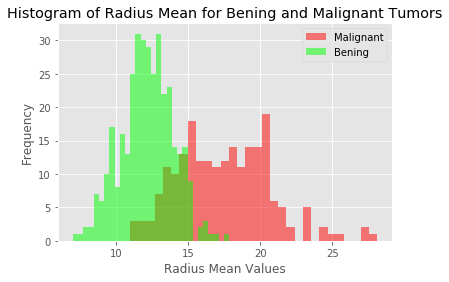

Most frequent malignant radius mean is:  20.101999999999997


In [4]:
m = plt.hist(data[data["diagnosis"] == "M"].radius_mean,bins=30,fc = (1,0,0,0.5),label = "Malignant")
b = plt.hist(data[data["diagnosis"] == "B"].radius_mean,bins=30,fc = (0,1,0,0.5),label = "Bening")
plt.legend()
plt.xlabel("Radius Mean Values")
plt.ylabel("Frequency")
plt.title("Histogram of Radius Mean for Bening and Malignant Tumors")
plt.show()
frequent_malignant_radius_mean = m[0].max()
index_frequent_malignant_radius_mean = list(m[0]).index(frequent_malignant_radius_mean)
most_frequent_malignant_radius_mean = m[1][index_frequent_malignant_radius_mean]
print("Most frequent malignant radius mean is: ",most_frequent_malignant_radius_mean)

* Lets look at other conclusions
* From this graph you can see that radius mean of malignant tumors are bigger than radius mean of bening tumors mostly.
* The bening distribution (green in graph) is approcimately bell-shaped that is shape of normal distribution (gaussian distribution)
* Also you can find result like that most frequent malignant radius mean is  

<a id="2"></a> <br>
## Outliers
* While looking histogram as yok can see there are rare values in bening distribution (green in graph)
* There values can be errors or rare events.
* These errors and rare events can be called outliers.
* Calculating outliers: 
    * first we need to calculate first quartile (Q1)(25%)
    * then find IQR(inter quartile range) = Q3-Q1
    * finally compute Q1 - 1.5*IQR and Q3 + 1.5*IQR
    * Anything outside this range is an outlier
    * lets write the code for bening tumor distribution for feature radius mean

In [5]:
data_bening = data[data["diagnosis"] == "B"]
data_malignant = data[data["diagnosis"] == "M"]
desc = data_bening.radius_mean.describe()
Q1 = desc[4]
Q3 = desc[6]
IQR = Q3-Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print("Anything outside this range is an outlier: (", lower_bound ,",", upper_bound,")")
data_bening[data_bening.radius_mean < lower_bound].radius_mean
print("Outliers: ",data_bening[(data_bening.radius_mean < lower_bound) | (data_bening.radius_mean > upper_bound)].radius_mean.values)

Anything outside this range is an outlier: ( 7.645000000000001 , 16.805 )
Outliers:  [ 6.981 16.84  17.85 ]


<a id="3"></a> <br>
## Box Plot 
* You can see outliers also from box plots
* We found 3 outlier in bening radius mean and in box plot there are 3 outlier.

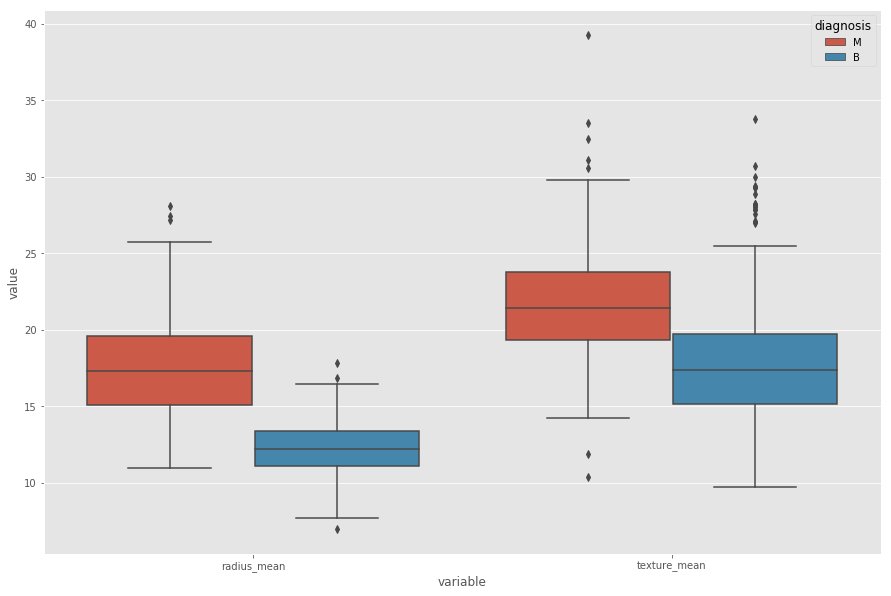

In [6]:
melted_data = pd.melt(data,id_vars = "diagnosis",value_vars = ['radius_mean', 'texture_mean'])
plt.figure(figsize = (15,10))
sns.boxplot(x = "variable", y = "value", hue="diagnosis",data= melted_data)
plt.show()

<a id="4"></a> <br>
## Summary Statistics
* Mean
* Variance: spread of distribution
* Standart deviation square root of variance
* Lets look at summary statistics of bening tumor radiance mean

In [7]:
print("mean: ",data_bening.radius_mean.mean())
print("variance: ",data_bening.radius_mean.var())
print("standart deviation (std): ",data_bening.radius_mean.std())
print("describe method: ",data_bening.radius_mean.describe())

mean:  12.14652380952381
variance:  3.170221722043872
standart deviation (std):  1.7805116461410389
describe method:  count    357.000000
mean      12.146524
std        1.780512
min        6.981000
25%       11.080000
50%       12.200000
75%       13.370000
max       17.850000
Name: radius_mean, dtype: float64


<a id="5"></a> <br>
## CDF
* Cumulative distribution function is the probability that the variable takes a value less than or equal to x. P(X <= x)
* Lets explain in cdf graph of bening radiues mean
* in graph, what is P(12 < X)? The answer is 0.5. The probability that the variable takes a values less than or equal to 12(radius mean) is 0.5.
* You can plot cdf with two different method

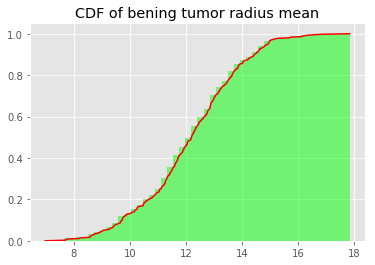

In [8]:
plt.hist(data_bening.radius_mean,bins=50,fc=(0,1,0,0.5),label='Bening',normed = True,cumulative = True)
sorted_data = np.sort(data_bening.radius_mean)
y = np.arange(len(sorted_data))/float(len(sorted_data)-1)
plt.plot(sorted_data,y,color='red')
plt.title('CDF of bening tumor radius mean')
plt.show()

<a id="6"></a> <br>
## Effect size
* One of the summary statistics.
* It describes size of an effect. It is simple way of quantifying the difference between two groups.
* In an other saying, effect size emphasises the size of the difference
* Use cohen effect size
* Cohen suggest that if d(effect size)= 0.2, it is small effect size, d = 0.5 medium effect size, d = 0.8 large effect size.
* lets compare size of the effect between bening radius mean and malignant radius mean
* Effect size is 2.2 that is too big and says that two groups are different from each other as we expect. Because our groups are bening radius mean and malignant radius mean that are different from each other

In [9]:
mean_diff = data_malignant.radius_mean.mean() - data_bening.radius_mean.mean()
var_bening = data_bening.radius_mean.var()
var_malignant = data_malignant.radius_mean.var()
var_pooled = (len(data_bening)*var_bening +len(data_malignant)*var_malignant ) / float(len(data_bening)+ len(data_malignant))
effect_size = mean_diff/np.sqrt(var_pooled)
print("Effect size: ",effect_size)

Effect size:  2.2048585165041428


<a id="7"></a> <br>
## Relationship Between Variables
* We can say that two variables are related with each other, if one of them gives information about others
* For example, price and distance. If you go long distance with taxi you will pay more. There fore we can say that price and distance are positively related with each other.
* Scatter Plot
* Simplest way to check relationship between two variables
* Lets look at relationship between radius mean and area mean
* In scatter plot you can see that when radius mean increases, area mean also increases. Therefore, they are positively correlated with each other.
* There is no correlation between area mean and fractal dimension se. Because when area mean changes, fractal dimension se is not affected by chance of area mean

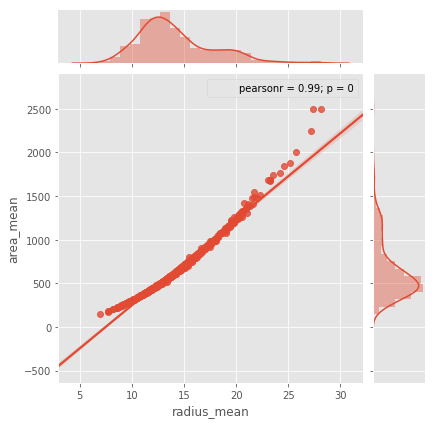

In [10]:
plt.figure(figsize = (15,10))
sns.jointplot(data.radius_mean,data.area_mean,kind="regg")
plt.show()

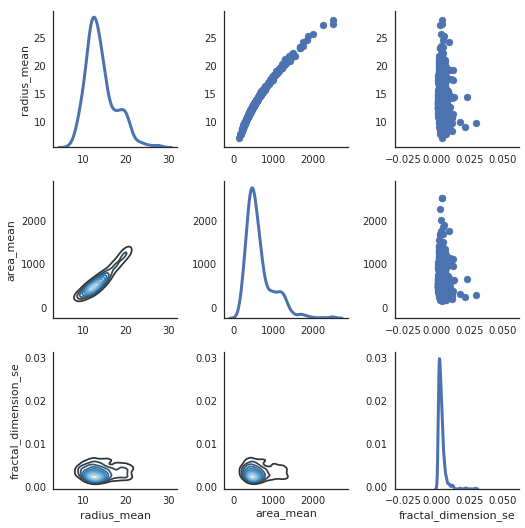

In [11]:
# Also we can look relationship between more than 2 distribution
sns.set(style = "white")
df = data.loc[:,["radius_mean","area_mean","fractal_dimension_se"]]
g = sns.PairGrid(df,diag_sharey = False,)
g.map_lower(sns.kdeplot,cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot,lw =3)
plt.show()

<a id="8"></a> <br>
## Correlation
* Strength of the relationship between two variables
* Lets look at correlation between all features.

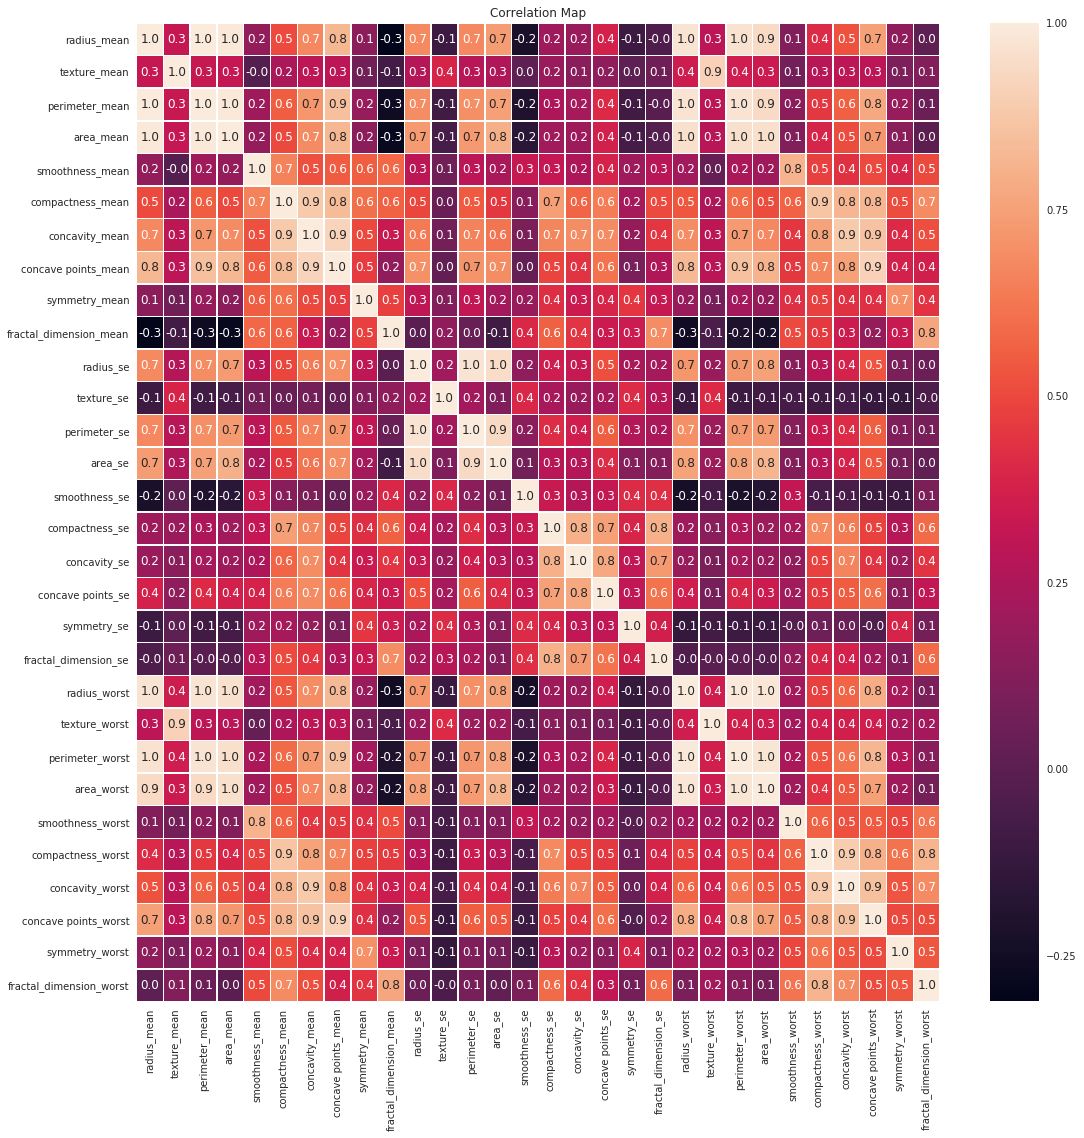

In [12]:
f,ax=plt.subplots(figsize = (18,18))
sns.heatmap(data.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map')
plt.savefig('graph.png')
plt.show()

* Huge matrix that includes a lot of numbers
* The range of this numbers are -1 to 1. 
* Meaning of 1 is two variable are positively correlated with each other like radius mean and area mean
* Meaning of zero is there is no correlation between variables like radius mean and fractal dimension se
* Meaning of -1 is two variables are negatively correlated with each other like radius mean and fractal dimension mean.Actually correlation between of them is not -1, it is -0.3 but the idea is that if sign of correlation is negative that means that there is negative correlation.

<a id="9"></a> <br>
## Covariance
* Covariance is measure of the tendency of two variables to vary together
* So covariance is maximized if two vectors are identical
* Covariance is zero if they are orthogonal.
* Covariance is negative if they point in opposite direction
* Lets look at covariance between radius mean and area mean. Then look at radius mean and fractal dimension se


In [13]:
np.cov(data.radius_mean,data.area_mean)
print("Covariance between radius mean and area mean: ",data.radius_mean.cov(data.area_mean))
print("Covariance between radius mean and fractal dimension se: ",data.radius_mean.cov(data.fractal_dimension_se))

Covariance between radius mean and area mean:  1224.4834093464567
Covariance between radius mean and fractal dimension se:  -0.00039762485764406293


<a id="10"></a> <br>
## Pearson Correlation
* Division of covariance by standart deviation of variables
* Lets look at pearson correlation between radius mean and area mean
* First lets use .corr() method that we used actually at correlation part. In correlation part we actually used pearson correlation :) 
* p1 and p2 is the same. In p1 we use corr() method, in p2 we apply definition of pearson correlation (cov(A,B)/(std(A)*std(B)))
* As we expect pearson correlation between area_mean and area_mean is 1 that means that they are same distribution
* Also pearson correlation between area_mean and radius_mean is 0.98 that means that they are positively correlated with each other and relationship between of the is very high.
* To be more clear what we did at correlation part and pearson correlation part is same.


In [14]:
p1 = data.loc[:,["area_mean","radius_mean"]].corr(method= "pearson")
p2 = data.radius_mean.cov(data.area_mean)/(data.radius_mean.std()*data.area_mean.std())
print('Pearson correlation: ')
print(p1)
print('Pearson correlation: ',p2)

Pearson correlation: 
             area_mean  radius_mean
area_mean     1.000000     0.987357
radius_mean   0.987357     1.000000
Pearson correlation:  0.987357170056613


<a id="11"></a> <br>
## Spearman's Rank Correlation
* Pearson correlation works well if the relationship between variables are linear and variables are roughly normal. But it is not robust, if there are outliers
* To compute spearman's correlation we need to compute rank of each value


In [15]:
ranked_data = data.rank()
spearman_corr = ranked_data.loc[:,["area_mean","radius_mean"]].corr(method= "pearson")
print("Spearman's correlation: ")
print(spearman_corr)

Spearman's correlation: 
             area_mean  radius_mean
area_mean     1.000000     0.999602
radius_mean   0.999602     1.000000


* Spearman's correlation is little higher than pearson correlation
    * If relationship between distributions are non linear, spearman's correlation tends to better estimate the strength of relationship
    * Pearson correlation can be affected by outliers. Spearman's correlation is more robust. 

<a id="12"></a> <br>
## Mean VS Median
* Sometimes instead of mean we need to use median. I am going to explain why we need to use median with an example
* Lets think that there are 10 people who work in a company. Boss of the company will make raise in their salary if their mean of salary is smaller than 5


In [16]:
salary = [1,4,3,2,5,4,2,3,1,500]
print("Mean of salary: ",np.mean(salary))

Mean of salary:  52.5


* Mean of salary is 52.5 so the boss thinks that oooo I gave a lot of salary to my employees. And do not makes raise in their salaries. However as you know this is not fair and 500(salary) is outlier for this salary list.
* Median avoids outliers

In [17]:
print("Median of salary: ",np.median(salary))

Median of salary:  3.0


* Now median of the salary is 3 and it is less than 5 and employees will take raise in their sallaries and they are happy and this situation is fair :)

<a id="13"></a> <br>
## Hypothesis Testing
* Classical Hypothesis Testing
* We want to answer this question: "given a sample and a apparent effecti what is the probability of seeing such an effect by chance"
* The first step is to quantify the size of the apparent effect by choosing a test statistic. Natural choice for the test statistic is the difference in means between two groups.
* The second step is to define null hypothesis that is model of the system based on the assumption that the apparent effect is not real. A null hypothesis is a type of hypothesis used in statistics that proposes that no statistical significance exists in a set of given observations. The null hypothesis is a hypothesis which people tries to disprove it. Alternative hypothesis is a hypothesis which people want to tries to prove it. 
* Third step is compute p-value that is probablity of seeing the apparent effect if the null hypothesis is true. Suppose we have null hypothesis test. Then we calculate p value. If p value is less than or equal to a threshold, we reject null hypothesis.
* If the p-value is low, the effect is said to be statistacally significant that means that it is unlikely to have occured by chance. Therefore we can say that the effect is more likely to appear in the larger population.
* Lets have an example. Null hypothesis: world is flatten. Alternative hypothesis: world is round. Several scientists set out to disprove the null hypothesis. This eventually led to the refection of the null hypothesis and acceptance of the alternative hypothesis.
* Other example. "this effect is real" this is null hypothesis. Based on that assumption we compute the probability of the apparent effect. That is the p-value. If p-value is low, we conclude that null hypothesis is unlikely to be true.
* Now lets make our example:
    * I want to learn that are radius mean and area mean related with each other? My null hypothesis is that "relationship between radius mean and area mean is zero in tumor population'.
    * Now we need to refute this null hypothesis in order to demonstrate that radius mean and area mean are related. (actually we know it from our previous experiences)
    * lets find p-value (probability value) 

In [18]:
statistic, p_value = stats.ttest_rel(data.radius_mean,data.area_mean)
print('p-value: ',p_value)

p-value:  1.5253492492559045e-184


* P values is almost zero so we can reject null hypothesis.

<a id="14"></a> <br>
## Normal(Gaussian) Distribution and z-score
* Also called bell shaped distribution
* Instead of making formal definition of gaussian distribution, I want to explain it with an example.
* The classic example is gaussian is IQ score.
    * In the world lets say average IQ is 110.
    * There are few people that are super intelligent and their IQs are higher than 110. It can be 140 or 150 but it is rare.
    * Also there are few people that have low intelligent and their IQ is lower than 110. It can be 40 or 50 but it is rare.
    * From these information we can say that mean of IQ is 110. And lets say standart deviation is 20.
    * Mean and standart deviation is parameters of normal distribution.
    * Lets create 100000 sample and visualize it with histogram.


mean:  110.06236414137976
standart deviation:  20.044966452114096


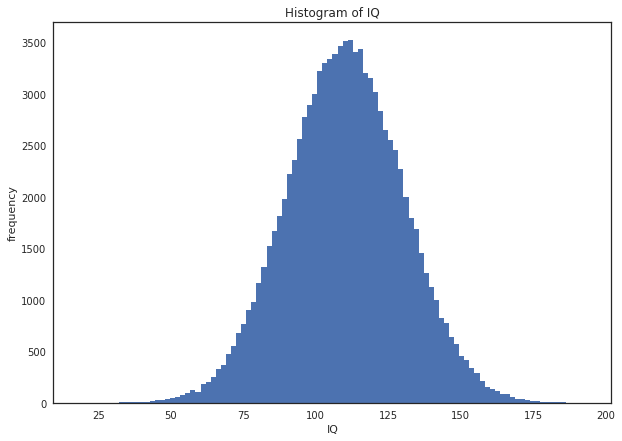

In [19]:
# parameters of normal distribution
mu, sigma = 110, 20  # mean and standard deviation
s = np.random.normal(mu, sigma, 100000)
print("mean: ", np.mean(s))
print("standart deviation: ", np.std(s))
# visualize with histogram
plt.figure(figsize = (10,7))
plt.hist(s, 100, normed=False)
plt.ylabel("frequency")
plt.xlabel("IQ")
plt.title("Histogram of IQ")
plt.show()

* As it can be seen from histogram most of the people are cumulated near to 110 that is mean of our normal distribution
* However what is the "most" I mentioned at previous sentence? What if I want to know what percentage of people should have an IQ score between 80 and 140?
* We will use z-score the answer this question. 
      * z = (x - mean)/std 
      * z1 = (80-110)/20 = -1.5
      * z2 = (140-110)/20 = 1.5
      * Distance between mean and 80 is 1.5std and distance between mean and 140 is 1.5std.
      * If you look at z table, you will see that 1.5std correspond to 0.4332
 <a href="https://ibb.co/hys6OT"><img src="https://preview.ibb.co/fYzWq8/123.png" alt="123" border="0"></a>
      * Lets calculate it with 2 because 1 from 80 to mean and other from mean to 140
      * 0.4332 * 2 = 0.8664
      * 86.64 % of people has an IQ between 80 and 140.
  <a href="https://ibb.co/fhc6OT"><img src="https://preview.ibb.co/bUi2xo/hist.png" alt="hist" border="0"></a>

* What percentage of people should have an IQ score less than 80?
* z = (110-80)/20 = 1.5
* Lets look at table of z score 0.4332. 43.32% of people has an IQ between 80 and mean(110).
* If we subtract from 50% to 43.32%, we ca n find percentage of people have an IQ score less than 80.
* 50-43.32 = 6.68. As a result, 6.68% of people have an IQ score less than 80.

# Feature Selection

In [20]:
data = pd.read_csv('../input/data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [21]:
# y includes our labels and x includes our features
y = data.diagnosis                          # M or B 
list = ['Unnamed: 32','id','diagnosis']
x = data.drop(list,axis = 1 )
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Number of Benign:  357
Number of Malignant :  212


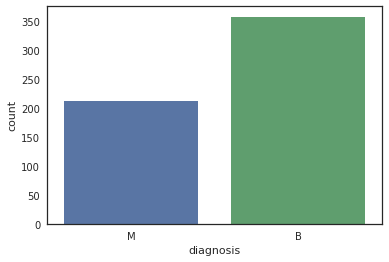

In [22]:
ax = sns.countplot(y,label="Count")       # M = 212, B = 357
B, M = y.value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

In [23]:
# import plotly.express as px
# fig = px.pie(df, values='radius_mean', names='diagnosis', title='Relation')
# fig.show()

Okey, now we have features but what does they mean or actually how much do we need to know about these features The answer is that we do not need to know meaning of these features however in order to imagine in our mind we should know something like variance, standart deviation, number of sample (count) or max min values. These type of information helps to understand about what is going on data. For example , the question is appeared in my mind the area_mean feature's max value is 2500 and smoothness_mean features' max 0.16340. Therefore do we need standardization or normalization before visualization, feature selection, feature extraction or classificaiton? The answer is yes and no not surprising ha :) Anyway lets go step by step and start with visualization.

In [24]:
x.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


# Visualization

## nucleus features vs diagnosis

In [25]:
df=data.copy()
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})
df.drop('id',axis=1,inplace=True)
df.drop('Unnamed: 32',axis=1,inplace=True)

df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [26]:
del list
features_mean=list(df.columns[1:11])
# split dataframe into two based on diagnosis
dfM=df[df['diagnosis'] ==1]
dfB=df[df['diagnosis'] ==0]

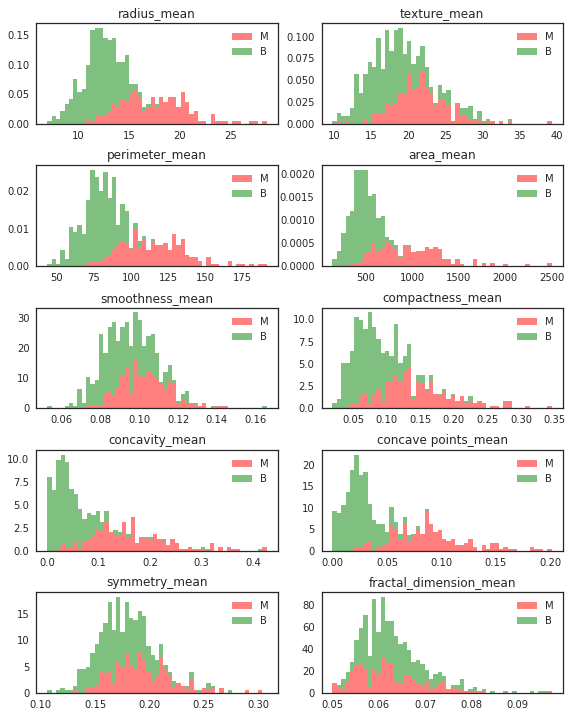

In [27]:
#Stack the data
plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(8,10))
axes = axes.ravel()
for idx,ax in enumerate(axes):
    ax.figure
    binwidth= (max(df[features_mean[idx]]) - min(df[features_mean[idx]]))/50
    ax.hist([dfM[features_mean[idx]],dfB[features_mean[idx]]], bins=np.arange(min(df[features_mean[idx]]), max(df[features_mean[idx]]) + binwidth, binwidth) , alpha=0.5,stacked=True, normed = True, label=['M','B'],color=['r','g'])
    ax.legend(loc='upper right')
    ax.set_title(features_mean[idx])
plt.tight_layout()
plt.show()

**Observations**

- mean values of cell radius, perimeter, area, compactness, concavity and concave points can be used in classification of the cancer. Larger values of these parameters tends to show a correlation with malignant tumors.
- mean values of texture, smoothness, symmetry or fractual dimension does not show a particular preference of one diagnosis over the other. In any of the histograms there are no noticeable large outliers that warrants further cleanup.

# Positive Correlation

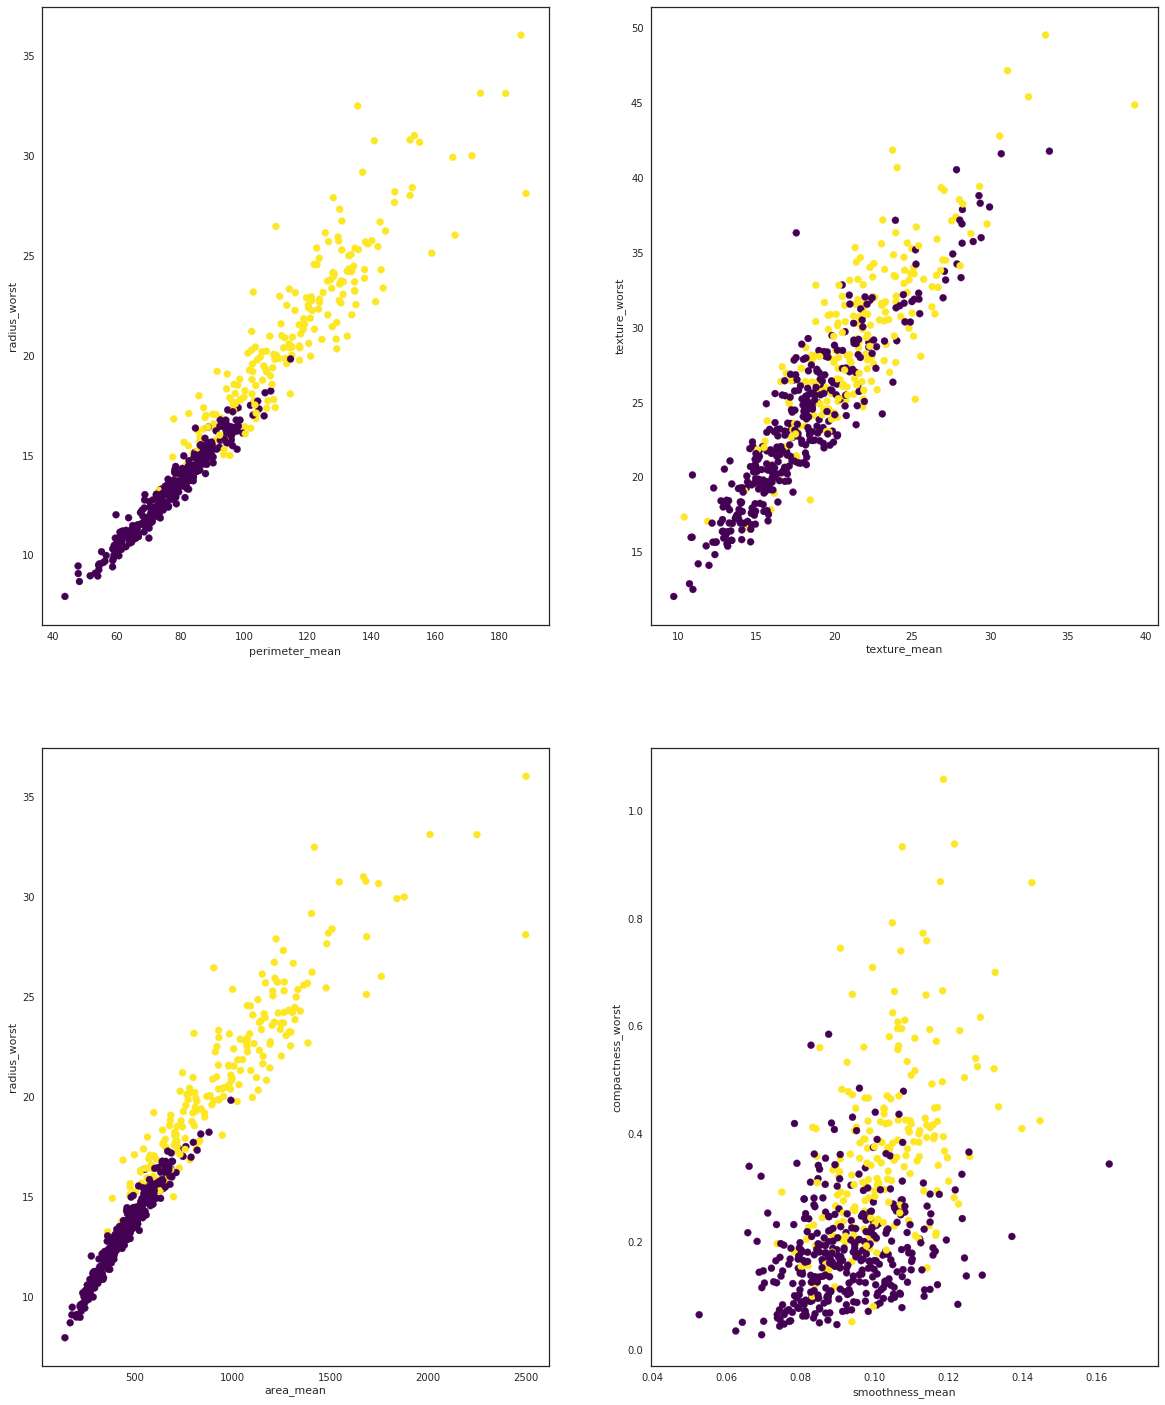

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create figure
fig, ax = plt.subplots(2, 2, figsize=(20, 25))

def safe_scatter(x, y, data, hue, ax):
    # If seaborn scatterplot exists
    if hasattr(sns, "scatterplot"):
        sns.scatterplot(x=x, y=y, data=data, hue=hue, ax=ax)
    else:
        # fallback: use matplotlib
        ax.scatter(data[x], data[y], c=data[hue], cmap="viridis")
        ax.set_xlabel(x)
        ax.set_ylabel(y)

# Plots
safe_scatter('perimeter_mean', 'radius_worst', df, 'diagnosis', ax[0][0])
safe_scatter('area_mean', 'radius_worst', df, 'diagnosis', ax[1][0])
safe_scatter('texture_mean', 'texture_worst', df, 'diagnosis', ax[0][1])
safe_scatter('smoothness_mean', 'compactness_worst', df, 'diagnosis', ax[1][1])

plt.show()

## Negative Correlation¶

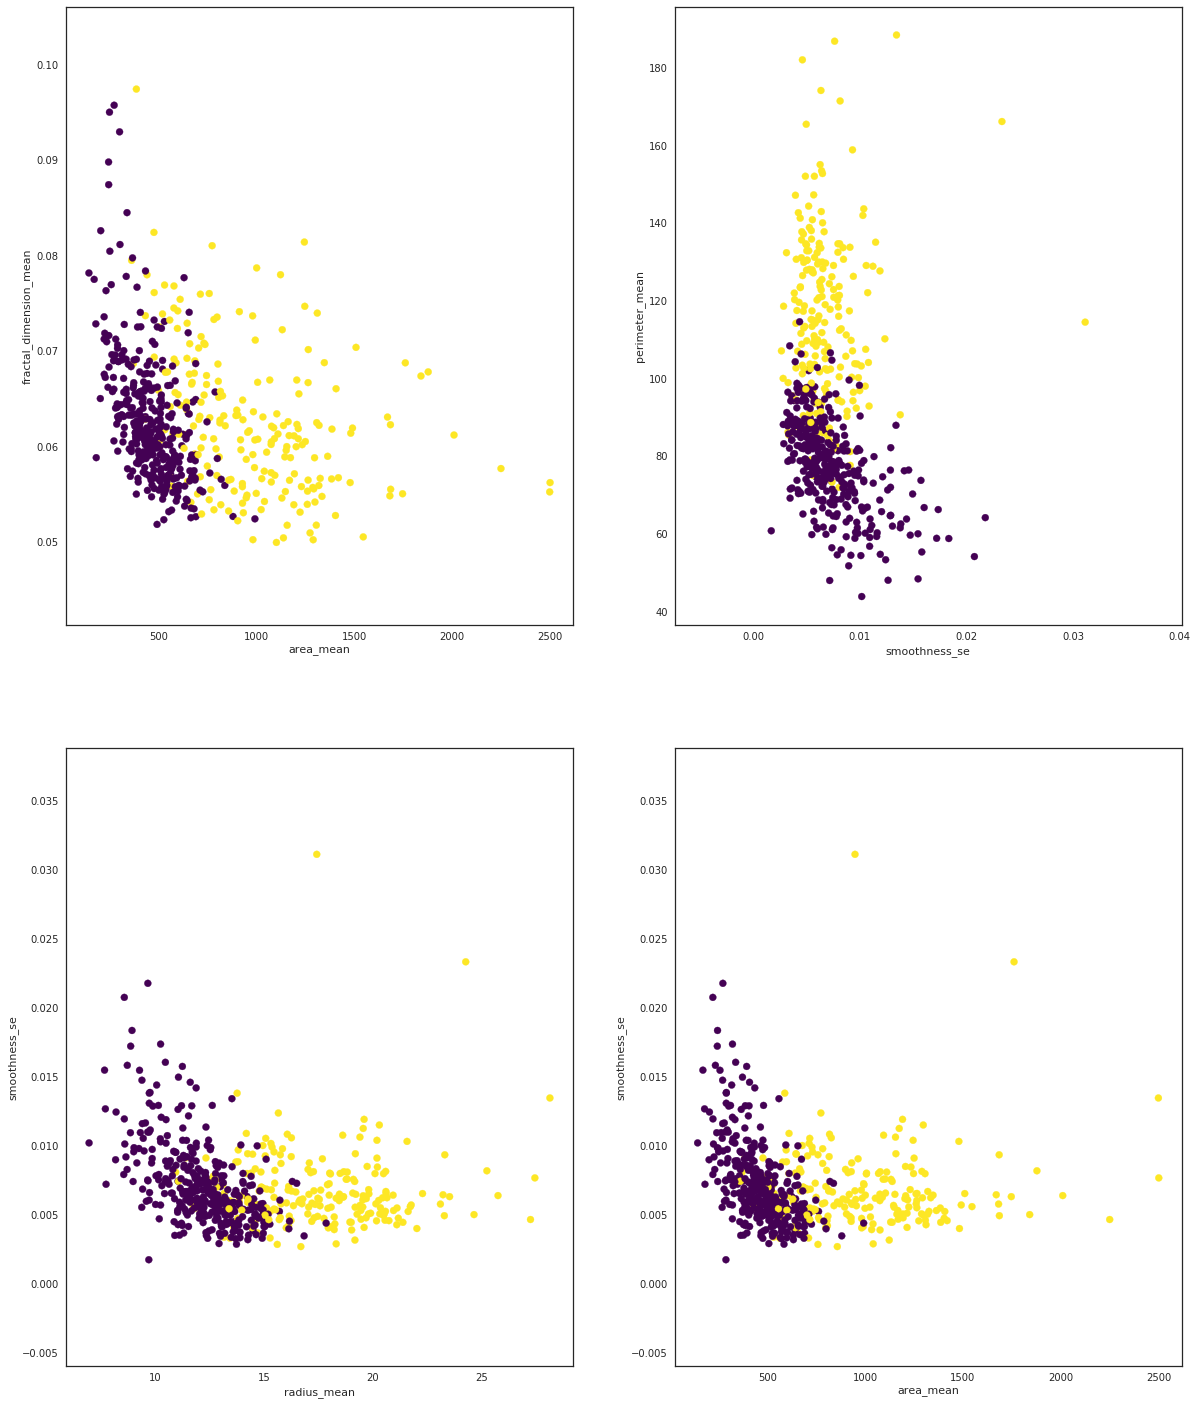

In [29]:
# Safe scatter function
def safe_scatter(x, y, data, hue, ax):
    if hasattr(sns, "scatterplot"):
        sns.scatterplot(x=x, y=y, data=data, hue=hue, ax=ax)
    else:
        # fallback using matplotlib
        ax.scatter(data[x], data[y], c=data[hue], cmap="viridis")
        ax.set_xlabel(x)
        ax.set_ylabel(y)

# Negative correlation plots
fig, ax = plt.subplots(2, 2, figsize=(20, 25))

safe_scatter('area_mean', 'fractal_dimension_mean', df, 'diagnosis', ax[0][0])
safe_scatter('radius_mean', 'smoothness_se', df, 'diagnosis', ax[1][0])
safe_scatter('smoothness_se', 'perimeter_mean', df, 'diagnosis', ax[0][1])
safe_scatter('area_mean', 'smoothness_se', df, 'diagnosis', ax[1][1])

plt.show()

In order to visualizate data we are going to use seaborn plots that is not used in other kernels to inform you and for diversity of plots. What I use in real life is mostly violin plot and swarm plot. Do not forget we are not selecting feature, we are trying to know data like looking at the drink list at the pub door.

Before violin and swarm plot we need to normalization or standirdization. Because differences between values of features are very high to observe on plot. I plot features in 3 group and each group includes 10 features to observe better.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

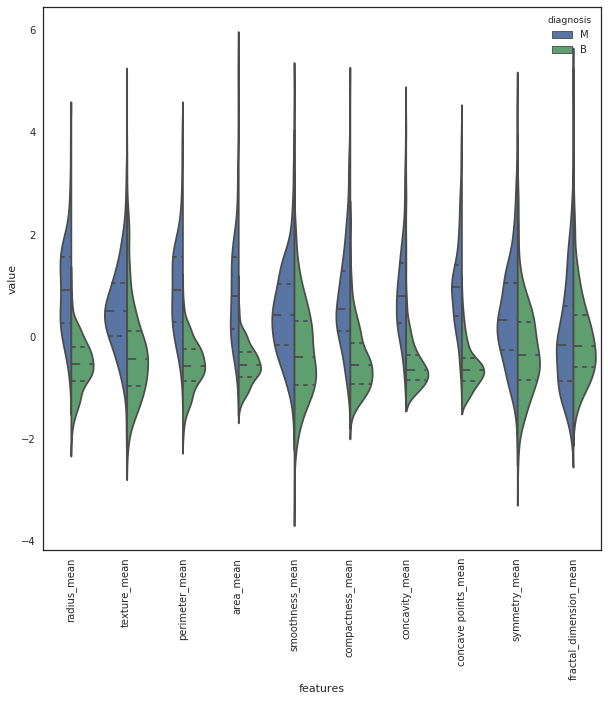

In [30]:
# first ten features
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

Lets interpret the plot above together. For example, in texture_mean feature, median of the Malignant and Benign looks like separated so it can be good for classification. However, in fractal_dimension_mean feature, median of the Malignant and Benign does not looks like separated so it does not gives good information for classification.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

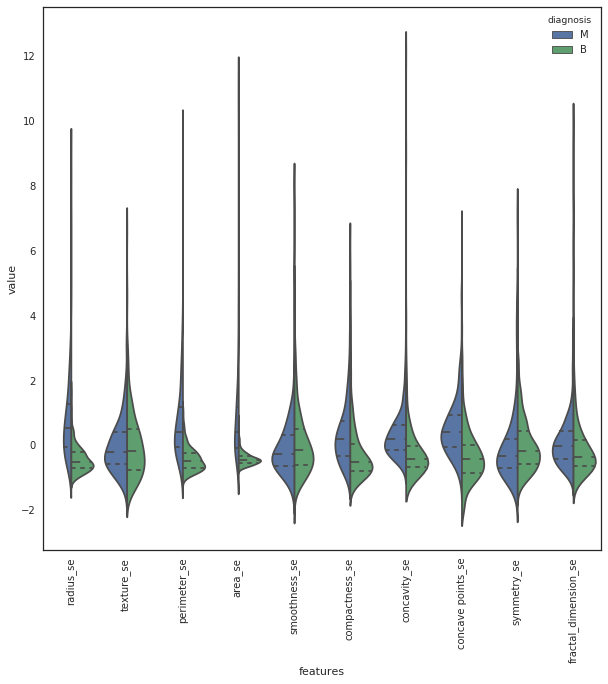

In [31]:
# Second ten features
data = pd.concat([y,data_n_2.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

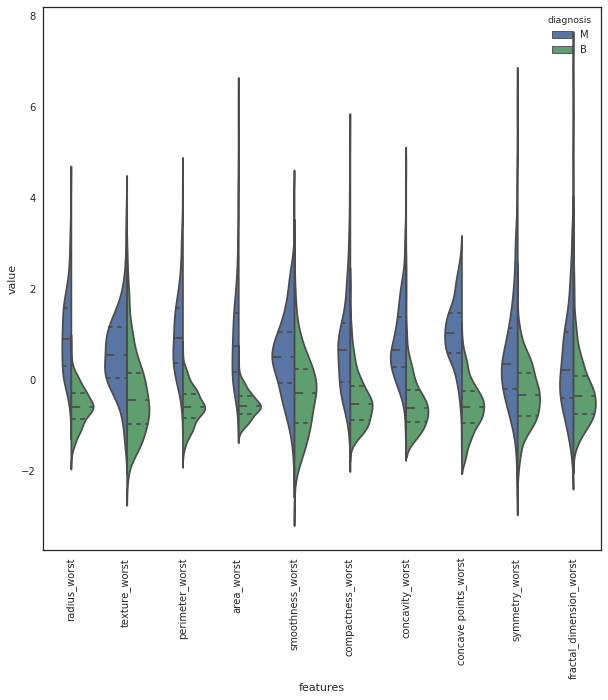

In [32]:
# Last ten features
data = pd.concat([y,data_n_2.iloc[:,20:31]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

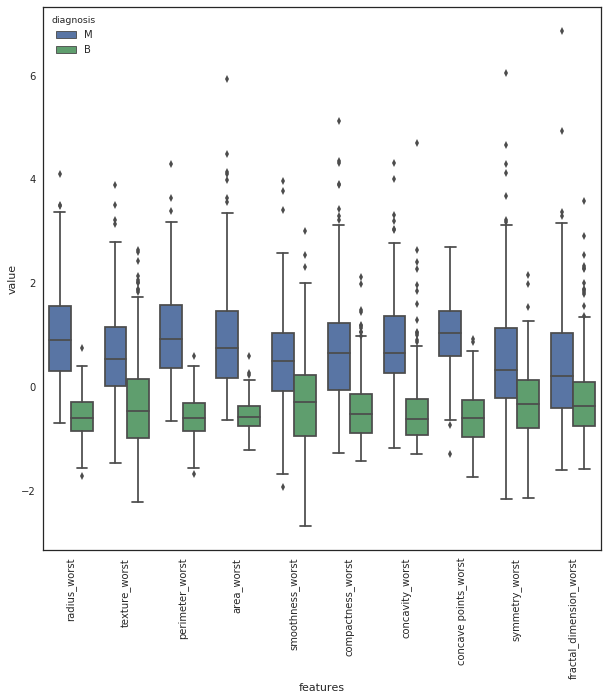

In [33]:
# As an alternative of violin plot, box plot can be used
# box plots are also useful in terms of seeing outliers
# I do not visualize all features with box plot
# In order to show you lets have an example of box plot
# If you want, you can visualize other features as well.
plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)

Lets interpret one more thing about plot above, variable of concavity_worst and concave point_worst looks like similar but how can we decide whether they are correlated with each other or not. (Not always true but, basically if the features are correlated with each other we can drop one of them)

In order to compare two features deeper, lets use joint plot. Look at this in joint plot below, it is really correlated. Pearsonr value is correlation value and 1 is the highest. Therefore, 0.86 is looks enough to say that they are correlated. Do not forget, we are not choosing features yet, we are just looking to have an idea about them.

Up to this point, we make some comments and discoveries on data already. If you like what we did, I am sure swarm plot will open the pub's door :)

In swarm plot, I will do three part like violin plot not to make plot very complex appearance

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

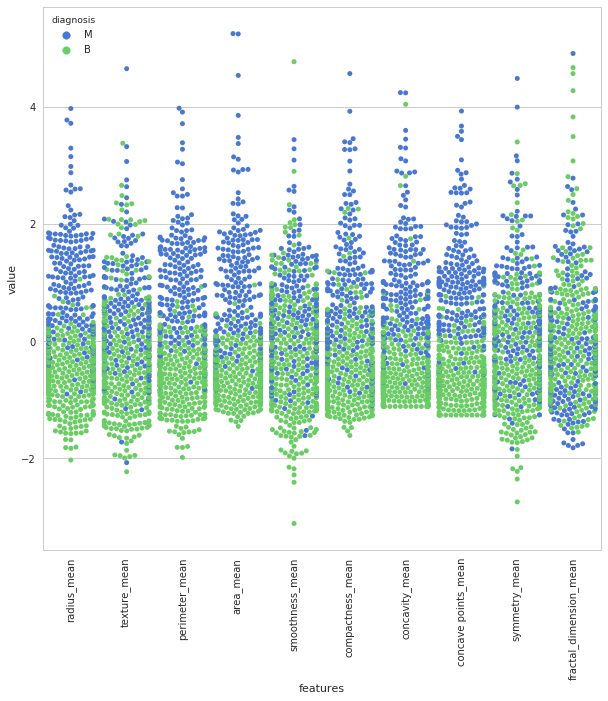

In [34]:
import time

sns.set(style="whitegrid", palette="muted")
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
tic = time.time()
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)

plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

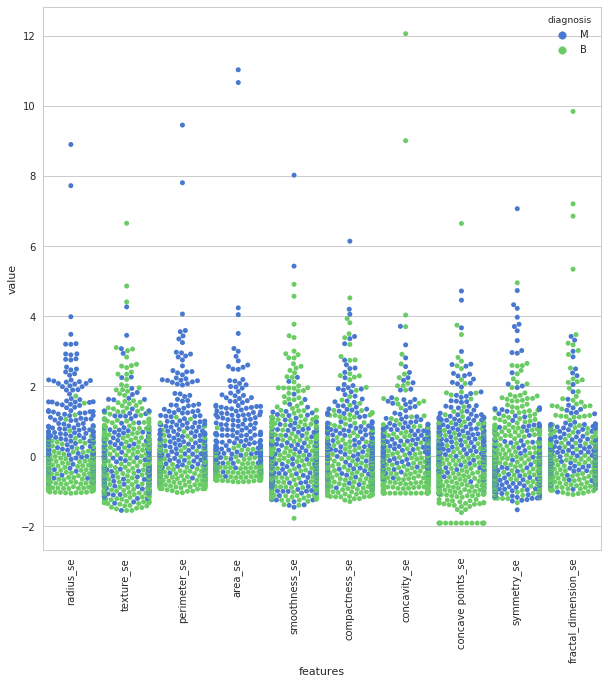

In [35]:
data = pd.concat([y,data_n_2.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)

swarm plot time:  9.524705171585083  s


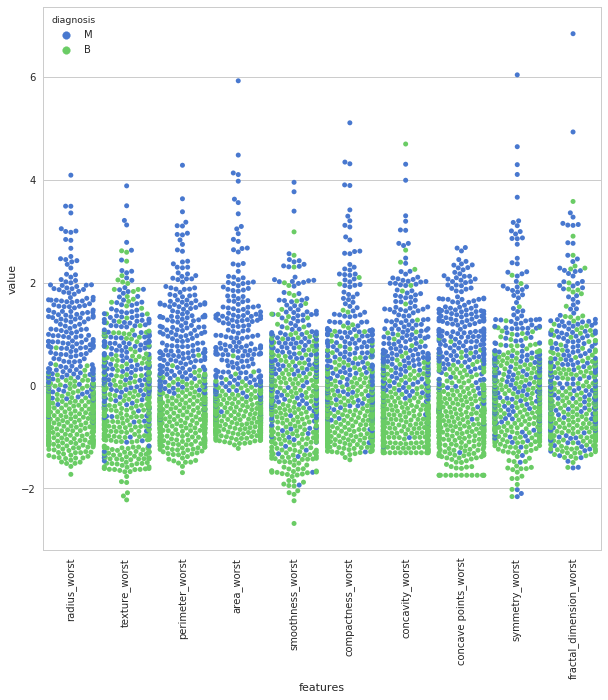

In [36]:
data = pd.concat([y,data_n_2.iloc[:,20:31]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)
toc = time.time()
plt.xticks(rotation=90)
print("swarm plot time: ", toc-tic ," s")

They looks cool right. And you can see variance more clear. Let me ask you a question, in these three plots which feature looks like more clear in terms of classification. In my opinion area_worst in last swarm plot looks like malignant and benign are seprated not totaly but mostly. Hovewer, smoothness_se in swarm plot 2 looks like malignant and benign are mixed so it is hard to classfy while using this feature.

What if we want to observe all correlation between features? Yes, you are right. The answer is heatmap that is old but powerful plot method.

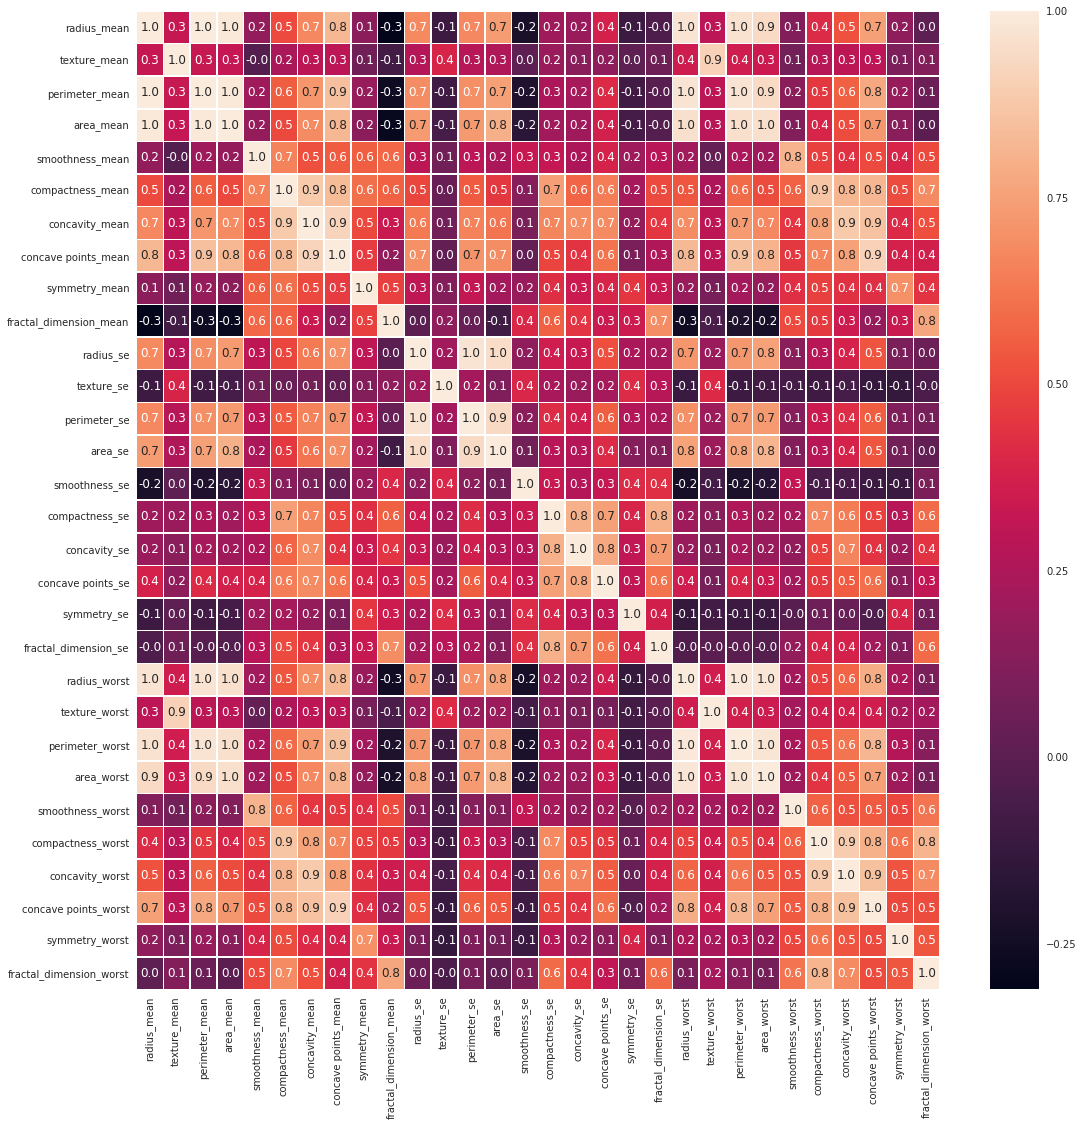

In [37]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

# Feature Selection and Random Forest Classification
## Feature selection with correlation

As it can be seen in map heat figure radius_mean, perimeter_mean and area_mean are correlated with each other so we will use only area_mean. If you ask how i choose area_mean as a feature to use, well actually there is no correct answer, I just look at swarm plots and area_mean looks like clear for me but we cannot make exact separation among other correlated features without trying. So lets find other correlated features and look accuracy with random forest classifier.

Compactness_mean, concavity_mean and concave points_mean are correlated with each other.Therefore I only choose concavity_mean. Apart from these, radius_se, perimeter_se and area_se are correlated and I only use area_se. radius_worst, perimeter_worst and area_worst are correlated so I use area_worst. Compactness_worst, concavity_worst and concave points_worst so I use concavity_worst. Compactness_se, concavity_se and concave points_se so I use concavity_se. texture_mean and texture_worst are correlated and I use texture_mean. area_worst and area_mean are correlated, I use area_mean.

In [38]:
drop_list1 = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean',
              'radius_se','perimeter_se','radius_worst','perimeter_worst',
              'compactness_worst','concave points_worst','compactness_se',
              'concave points_se','texture_worst','area_worst']
x_1 = x.drop(drop_list1,axis = 1 )        # do not modify x, we will use it later 
x_1.head()

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.7119,0.4601,0.11890
1,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2416,0.2750,0.08902
2,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.4504,0.3613,0.08758
3,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6869,0.6638,0.17300
4,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.4000,0.2364,0.07678


After drop correlated features, as it can be seen in below correlation matrix, there are no more correlated features. Actually, I know and you see there is correlation value 0.9 but lets see together what happen if we do not drop it.

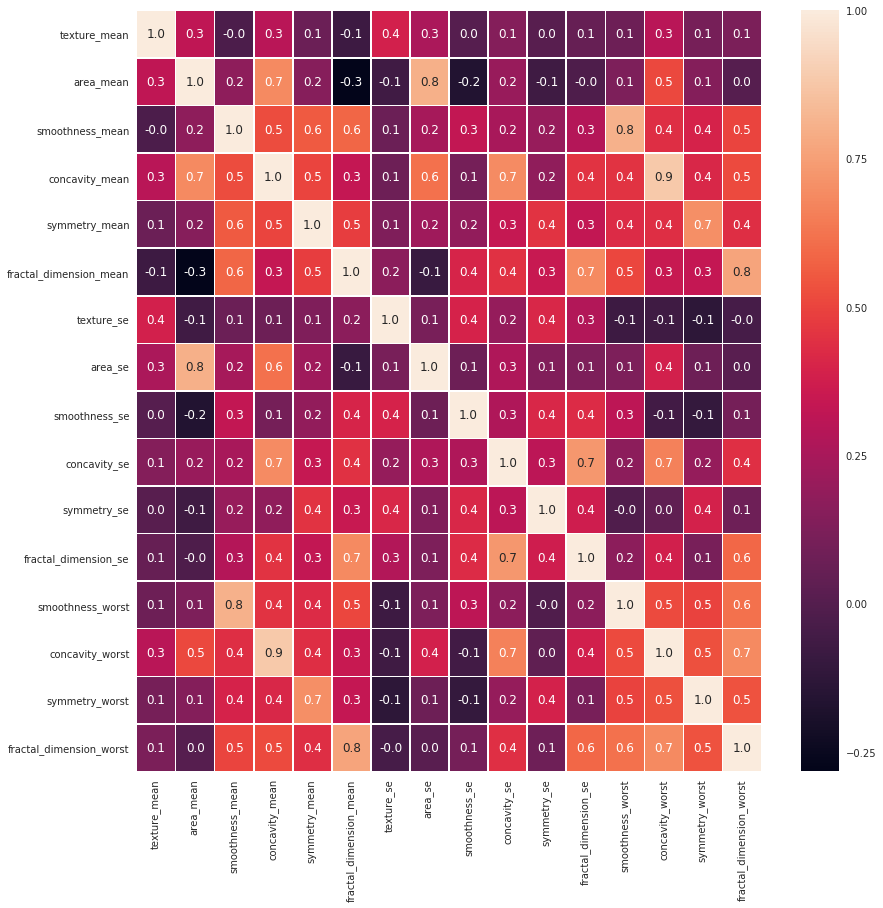

In [39]:
#correlation map
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(x_1.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

Well, we choose our features but did we choose correctly ? Lets use random forest and find accuracy according to chosen features.

Accuracy is:  0.9532163742690059


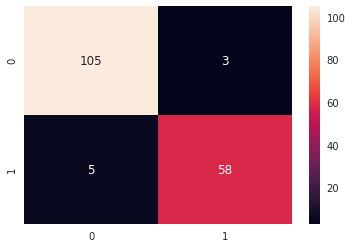

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(x_1, y, test_size=0.3, random_state=42)

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

## Univariate feature selection

In univariate feature selection, we will use SelectKBest that removes all but the k highest scoring features. 
http://scikitlearn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest

In this method we need to choose how many features we will use. For example, will k (number of features) be 5 or 10 or 15? The answer is only trying or intuitively. I do not try all combinations but I only choose k = 5 and find best 5 features.

In [41]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find best scored 5 features
select_feature = SelectKBest(chi2, k=5).fit(x_train, y_train)

In [42]:
print('Score list:', select_feature.scores_)
print('Feature list:', x_train.columns)

Score list: [6.06916433e+01 3.66899557e+04 1.00015175e-01 1.30547650e+01
 1.95982847e-01 3.42575072e-04 4.07131026e-02 6.12741067e+03
 1.32470372e-03 6.92896719e-01 1.39557806e-03 2.65927071e-03
 2.63226314e-01 2.58858117e+01 1.00635138e+00 1.23087347e-01]
Feature list: Index(['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'area_se',
       'smoothness_se', 'concavity_se', 'symmetry_se', 'fractal_dimension_se',
       'smoothness_worst', 'concavity_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')


Best 5 feature to classify is that area_mean, area_se, texture_mean, concavity_worst and concavity_mean. So lets se what happens if we use only these best scored 5 feature.

Accuracy is:  0.9473684210526315


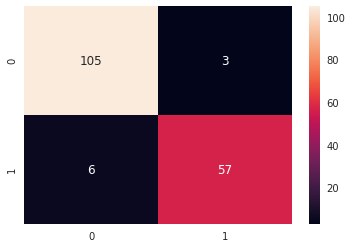

In [43]:
x_train_2 = select_feature.transform(x_train)
x_test_2 = select_feature.transform(x_test)
#random forest classifier with n_estimators=10 (default)
clf_rf_2 = RandomForestClassifier()      
clr_rf_2 = clf_rf_2.fit(x_train_2,y_train)
ac_2 = accuracy_score(y_test,clf_rf_2.predict(x_test_2))
print('Accuracy is: ',ac_2)
cm_2 = confusion_matrix(y_test,clf_rf_2.predict(x_test_2))
sns.heatmap(cm_2,annot=True,fmt="d")

# Recursive feature elimination (RFE) 

http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html

Basically, it uses one of the classification methods (random forest in our example), assign weights to each of features. Whose absolute weights are the smallest are pruned from the current set features. That procedure is recursively repeated on the pruned set until the desired number of features

Like previous method, we will use 5 features. However, which 5 features will we use ? We will choose them with RFE method.

In [44]:
from sklearn.feature_selection import RFE
# Create the RFE object and rank each pixel
clf_rf_3 = RandomForestClassifier()      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=5, step=1)
rfe = rfe.fit(x_train, y_train)

In [45]:
print('Chosen best 5 feature by rfe:',x_train.columns[rfe.support_])

Chosen best 5 feature by rfe: Index(['texture_mean', 'area_mean', 'concavity_mean', 'area_se',
       'symmetry_worst'],
      dtype='object')


Chosen 5 best features by rfe is texture_mean, area_mean, concavity_mean, area_se, concavity_worst. They are exactly similar with previous (selectkBest) method. Therefore we do not need to calculate accuracy again. Shortly, we can say that we make good feature selection with rfe and selectkBest methods. However as you can see there is a problem, okey I except we find best 5 feature with two different method and these features are same but why it is 5. Maybe if we use best 2 or best 15 feature we will have better accuracy. Therefore lets see how many feature we need to use with rfecv method.

## Recursive feature elimination with cross validation

In [46]:
from sklearn.feature_selection import RFECV

# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_4 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(x_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', x_train.columns[rfecv.support_])

Optimal number of features : 13
Best features : Index(['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'symmetry_mean', 'area_se', 'smoothness_se', 'concavity_se',
       'symmetry_se', 'smoothness_worst', 'concavity_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')


Finally, we find best 11 features that are texture_mean, area_mean, concavity_mean, texture_se, area_se, concavity_se, symmetry_se, smoothness_worst, concavity_worst, symmetry_worst and fractal_dimension_worst for best classification. Lets look at best accuracy with plot.

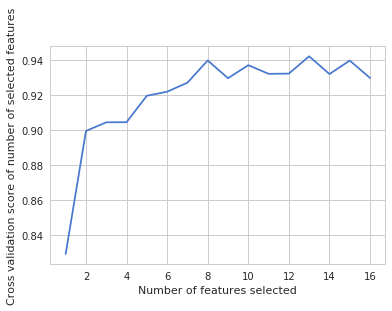

In [47]:
# Plot number of features VS. cross-validation scores
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

Lets look at what we did up to this point. Lets accept that guys this data is very easy to classification. However, our first purpose is actually not finding good accuracy. Our purpose is learning how to make feature selection and understanding data. Then last make our last feature selection method.

## Tree based feature selection
http://scikitlearn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In random forest classification method there is a featureimportances attributes that is the feature importances (the higher, the more important the feature). !!! To use feature_importance method, in training data there should not be correlated features. Random forest choose randomly at each iteration, therefore sequence of feature importance list can change.

Feature ranking:
1. feature 1 (0.225874)
2. feature 3 (0.191373)
3. feature 7 (0.176874)
4. feature 13 (0.117630)
5. feature 14 (0.058338)
6. feature 2 (0.035542)
7. feature 12 (0.031761)
8. feature 15 (0.027414)
9. feature 0 (0.027388)
10. feature 9 (0.020519)
11. feature 10 (0.019839)
12. feature 4 (0.018705)
13. feature 11 (0.018448)
14. feature 8 (0.014159)
15. feature 6 (0.008200)
16. feature 5 (0.007938)


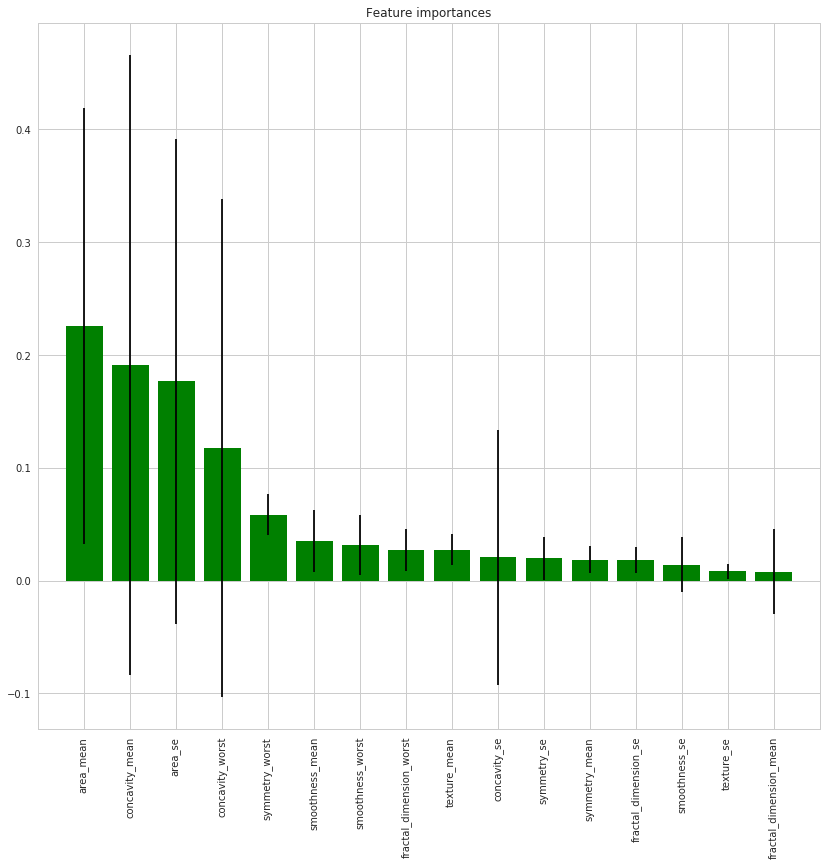

In [48]:
clf_rf_5 = RandomForestClassifier()      
clr_rf_5 = clf_rf_5.fit(x_train,y_train)
importances = clr_rf_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), x_train.columns[indices],rotation=90)
plt.xlim([-1, x_train.shape[1]])
plt.show()

As you can seen in plot above, after 5 best features importance of features decrease. Therefore we can focus these 5 features. As I sad before, I give importance to understand features and find best of them.

## Feature Extraction with PCA

http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html 

We will use principle component analysis (PCA) for feature extraction. Before PCA, we need to normalize data for better performance of PCA.

Text(0,0.5,'explained_variance_ratio_')

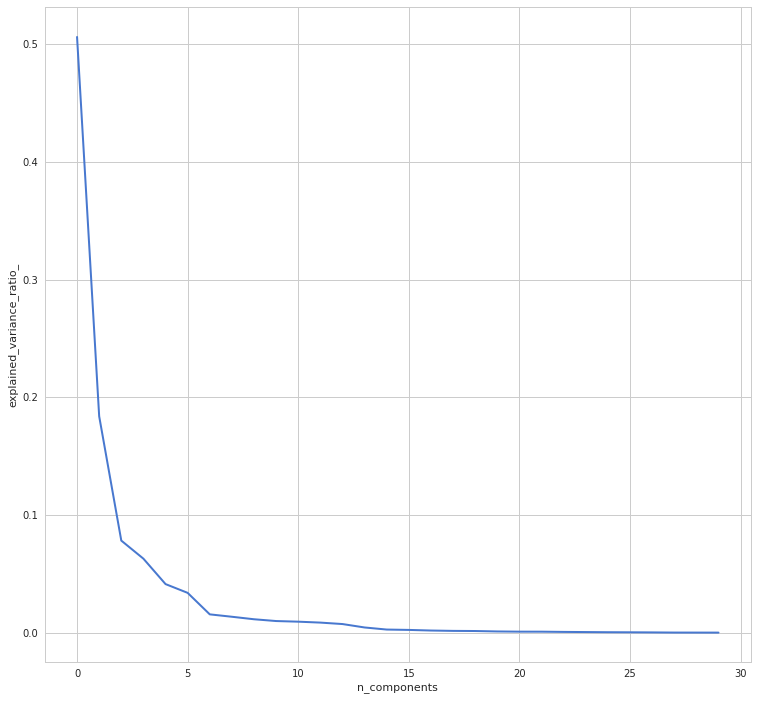

In [49]:
# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
#normalization
x_train_N = (x_train-x_train.mean())/(x_train.max()-x_train.min())
x_test_N = (x_test-x_test.mean())/(x_test.max()-x_test.min())

from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x_train_N)

plt.figure(1, figsize=(14, 13))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')

According to variance ration, 3 component can be chosen.

In [50]:
gc.collect()

47926

# Logistic regression from Scratch

In [51]:
# %%initialize
# lets initialize parameters
# So what we need is dimension 4096 that is number of pixels as a parameter for our initialize method(def)
def initialize_weights_and_bias(dimension):
    w = np.full((dimension,1),0.01)
    b = 0.0
    return w, b

In [52]:
#%% sigmoid
# calculation of z
#z = np.dot(w.T,x_train)+b
def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head
#y_head = sigmoid(5)

In [53]:
#%% forward and backward
# In backward propagation we will use y_head that found in forward progation
# Therefore instead of writing backward propagation method, lets combine forward propagation and backward propagation
def forward_backward_propagation(w,b,x_train,y_train):
    # forward propagation
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]      # x_train.shape[1]  is for scaling
    # backward propagation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1] # x_train.shape[1]  is for scaling
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]                 # x_train.shape[1]  is for scaling
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    return cost,gradients

In [54]:
#%%# Updating(learning) parameters
def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
    # updating(learning) parameters is number_of_iterarion times
    for i in range(number_of_iterarion):
        # make forward and backward propagation and find cost and gradients
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        # lets update
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    # we update(learn) parameters weights and bias
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

In [55]:
#%%  # prediction
def predict(w,b,x_test):
    # x_test is a input for forward propagation
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    # if z is bigger than 0.5, our prediction is sign one (y_head=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0),
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction
# predict(parameters["weight"],parameters["bias"],x_test)

In [56]:
# %%
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):
    # initialize
    dimension =  x_train.shape[0]  # that is 4096
    w,b = initialize_weights_and_bias(dimension)
    # do not change learning rate
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)
    
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)
    y_prediction_train = predict(parameters["weight"],parameters["bias"],x_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))

In [57]:
data = pd.read_csv("../input/data.csv")
data.drop(['Unnamed: 32',"id"], axis=1, inplace=True)
data.diagnosis = [1 if each == "M" else 0 for each in data.diagnosis]
y = data.diagnosis.values
x_data = data.drop(['diagnosis'], axis=1)

In [58]:
# %% normalization
x = (x_data -np.min(x_data))/(np.max(x_data)-np.min(x_data)).values

In [59]:
# %%train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

x_train = x_train.T
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T

print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (30, 483)
x test:  (30, 86)
y train:  (483,)
y test:  (86,)


Cost after iteration 0: 0.692836
Cost after iteration 10: 0.498576
Cost after iteration 20: 0.404996
Cost after iteration 30: 0.350059
Cost after iteration 40: 0.313747
Cost after iteration 50: 0.287767
Cost after iteration 60: 0.268114
Cost after iteration 70: 0.252627
Cost after iteration 80: 0.240036
Cost after iteration 90: 0.229543


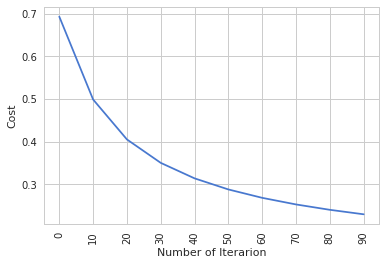

train accuracy: 94.40993788819875 %
test accuracy: 94.18604651162791 %


In [60]:
logistic_regression(x_train, y_train, x_test, y_test,
                    learning_rate = 1, num_iterations = 100) 

In [61]:
# sklearn
from sklearn import linear_model
logreg = linear_model.LogisticRegression(random_state = 42,max_iter= 150)
print("test accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_test.T, y_test.T)))
print("train accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_train.T, y_train.T)))

test accuracy: 0.9651162790697675 
train accuracy: 0.9668737060041408 


## Experimenting with different threshold values

In [62]:
from sklearn.metrics import confusion_matrix, accuracy_score
logreg = linear_model.LogisticRegression(random_state = 42,max_iter= 150)
logreg.fit(x_train.T, y_train.T)

for i in range(1, 5):
    cm1 = 0
    y_pred1 = logreg.predict_proba(x_test.T)[:, 1]
    threshold = i / 10
    y_pred2 = (y_pred1 > threshold).astype(int)
    cm1 = confusion_matrix(y_test.T, y_pred2)

    print(
        'With',
        threshold,
        'threshold the Confusion Matrix is ',
        '\n\n',
        cm1,
        '\n\n',
        'with',
        cm1[0, 0] + cm1[1, 1],
        'correct predictions, ',
        '\n\n',
        cm1[0, 1],
        'Type I errors( False Positives), ',
        '\n\n',
        cm1[1, 0],
        'Type II errors( False Negatives), ',
        '\n\n',
        'Accuracy score: ',
        accuracy_score(y_test, y_pred2),
        '\n\n',
        'Sensitivity: ',
        cm1[1, 1] / (float(cm1[1, 1] + cm1[1, 0])),
        '\n\n',
        'Specificity: ',
        cm1[0, 0] / (float(cm1[0, 0] + cm1[0, 1])),
        '\n\n',
        '====================================================',
        '\n\n',
    )

With 0.1 threshold the Confusion Matrix is  

 [[30 24]
 [ 0 32]] 

 with 62 correct predictions,  

 24 Type I errors( False Positives),  

 0 Type II errors( False Negatives),  

 Accuracy score:  0.7209302325581395 

 Sensitivity:  1.0 

 Specificity:  0.5555555555555556 



With 0.2 threshold the Confusion Matrix is  

 [[49  5]
 [ 0 32]] 

 with 81 correct predictions,  

 5 Type I errors( False Positives),  

 0 Type II errors( False Negatives),  

 Accuracy score:  0.9418604651162791 

 Sensitivity:  1.0 

 Specificity:  0.9074074074074074 



With 0.3 threshold the Confusion Matrix is  

 [[52  2]
 [ 0 32]] 

 with 84 correct predictions,  

 2 Type I errors( False Positives),  

 0 Type II errors( False Negatives),  

 Accuracy score:  0.9767441860465116 

 Sensitivity:  1.0 

 Specificity:  0.9629629629629629 



With 0.4 threshold the Confusion Matrix is  

 [[53  1]
 [ 1 31]] 

 with 84 correct predictions,  

 1 Type I errors( False Positives),  

 1 Type II errors( False 

In [63]:
# Set the threshold
threshold = 0.4

# Create a dictionary with class weights
class_weights = {0: threshold, 1: 1 - threshold}

# Instantiate the model with class weights
logreg_1 =  linear_model.LogisticRegression(random_state = 42,
                                            class_weight=class_weights,max_iter= 150)

# Fit the model
logreg_1.fit(x_train.T, y_train.T)

LogisticRegression(C=1.0, class_weight={0: 0.4, 1: 0.6}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=150,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=42,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [64]:
y_pred_test_1 = logreg_1.predict(x_test.T)

y_pred_test_1

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1])

In [65]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test.T, y_pred_test_1)))

Model accuracy score: 0.9767


In [66]:
# Print the Confusion Matrix and slice it into four categories

from sklearn.metrics import confusion_matrix

cm_1 = confusion_matrix(y_test.T, y_pred_test_1)

print('Confusion matrix\n\n', cm_1)

print('\nTrue Positives(TP) = ', cm_1[0,0])

print('\nTrue Negatives(TN) = ', cm_1[1,1])

print('\nFalse Positives(FP) = ', cm_1[0,1])

print('\nFalse Negatives(FN) = ', cm_1[1,0])

Confusion matrix

 [[53  1]
 [ 1 31]]

True Positives(TP) =  53

True Negatives(TN) =  31

False Positives(FP) =  1

False Negatives(FN) =  1


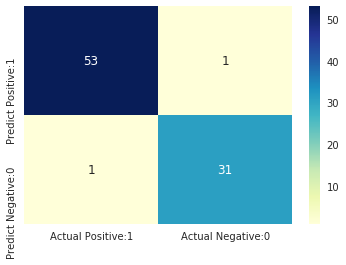

In [67]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm_1, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [68]:
from sklearn.metrics import classification_report
print(classification_report(y_test.T, y_pred_test_1))

             precision    recall  f1-score   support

          0       0.98      0.98      0.98        54
          1       0.97      0.97      0.97        32

avg / total       0.98      0.98      0.98        86



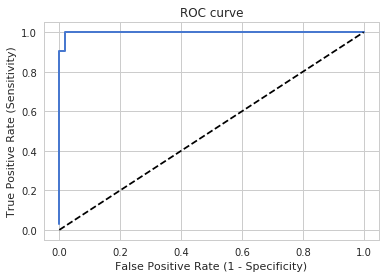

In [69]:
# plot ROC Curve
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test.T, y_pred1)

plt.figure(figsize=(6, 4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0, 1], [0, 1], 'k--')

plt.rcParams['font.size'] = 12

plt.title('ROC curve')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [70]:
from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test,y_pred1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.9983


In [71]:
# Applying 5-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(logreg_1, x_train.T, y_train.T, cv = 5, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores.mean()))

Cross-validation scores:0.9606743986254296


# Neural NetWork

In [72]:
import keras
from keras.models import Sequential
from keras.layers import Dense

classifier = Sequential()
#adding the input and first hidden layer

classifier.add(Dense(16, activation='relu', kernel_initializer='glorot_uniform',input_dim=30))

#adding second layer
classifier.add(Dense(6, activation='relu', kernel_initializer='glorot_uniform'))

#adding the output layer
classifier.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

Using TensorFlow backend.


In [73]:
classifier.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [74]:
classifier.fit(x_train.T, y_train.T,batch_size=100,epochs=150,verbose=1)

Epoch 1/150
483/483 [==============================] - 7s 15ms/step - loss: 0.6916 - acc: 0.5259
Epoch 2/150
483/483 [==============================] - 0s 32us/step - loss: 0.6899 - acc: 0.7847
Epoch 3/150
483/483 [==============================] - 0s 32us/step - loss: 0.6880 - acc: 0.8199
Epoch 4/150
483/483 [==============================] - 0s 32us/step - loss: 0.6854 - acc: 0.7847
Epoch 5/150
483/483 [==============================] - 0s 32us/step - loss: 0.6827 - acc: 0.7619
Epoch 6/150
483/483 [==============================] - 0s 32us/step - loss: 0.6795 - acc: 0.7536
Epoch 7/150
483/483 [==============================] - 0s 30us/step - loss: 0.6756 - acc: 0.7619
Epoch 8/150
483/483 [==============================] - 0s 31us/step - loss: 0.6710 - acc: 0.7764
Epoch 9/150
483/483 [==============================] - 0s 33us/step - loss: 0.6656 - acc: 0.7805
Epoch 10/150
483/483 [==============================] - 0s 31us/step - loss: 0.6594 - acc: 0.7992
Epoch 11/150
483/483 [=======

In [75]:
y_pred=classifier.predict(x_test.T)
y_pred = (y_pred>0.5)

In [76]:
from sklearn.metrics import accuracy_score

print(f"The test accuracy is very high i.e.{accuracy_score(y_test,y_pred)}")

The test accuracy is very high i.e.0.9883720930232558


In [77]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[54,  0],
       [ 1, 31]])

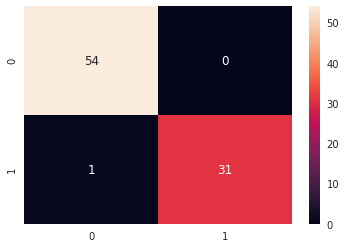

In [78]:
sns.heatmap(cm,annot=True)